In [1]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy.engine import URL
from sqlalchemy import create_engine

# SQL

In [7]:
CTHT_query = """
SELECT
    Item189 as 'L1byRef'
    ,Item20 as 'L5byRef'
    ,TblFinal.Station
    ,TblFinal.stationID
    ,TblFinal.tDateTime
FROM ate_db_tblfinal_new.dbo.TblFinal

JOIN ate_db_tblfinal_new.dbo.TblFinal2 
on (TblFinal2.SerialNumber = TblFinal.SerialNumber
and TblFinal2.tDateTime = TblFinal.tDateTime
)

where TblFinal.UserName = 7924
and ItemNameType = 16920
and TblFinal.tDateTime between '2022-11-23 09:54' and '2022-11-25'
and TblFinal.SerialNumber = 3434048463
"""

FT_query = """
SELECT
    ItemNameType
    ,TblFinal.SerialNumber
    ,Item195 as 'L1byRef(Item195)'
    ,Item187 as 'L5byRef(Item187)'
    ,TblFinal.Station
    ,TblFinal.stationID
    ,TblFinal.tDateTime
FROM ate_db_tblfinal_new.dbo.TblFinal

JOIN ate_db_tblfinal_new.dbo.TblFinal2 
on (TblFinal2.SerialNumber = TblFinal.SerialNumber
and TblFinal2.tDateTime = TblFinal.tDateTime
)

where TblFinal.UserName = 7924
and ItemNameType = 16919
and TblFinal.tDateTime between '2022-11-23 09:54' and '2022-11-26'
and TblFinal.SerialNumber = 3434048539
"""

In [8]:
connection_string = "DRIVER={SQL Server};SERVER=XINWPD-ATESQLR;DATABASE=ate_db_tblfinal_new;UID=ate_oper;PWD=ate.oper"
connection_url = URL.create("mssql+pyodbc", query={"odbc_connect": connection_string})
engine = create_engine(connection_url)

CTHT = pd.read_sql(CTHT_query, engine)
FT = pd.read_sql(FT_query, engine)

CT/HT

In [4]:
CTHT.head()

,L1byRef,L5byRef,Station,stationID,tDateTime
0,-0.01,0.80,T5_3A04CT01,6,2022-11-23 09:54:48
1,1.56,1.08,T5_3A04CT01,6,2022-11-23 09:59:25
2,1.47,1.47,T5_3A04CT01,6,2022-11-23 10:00:57
3,1.54,1.24,T5_3A04CT01,6,2022-11-23 10:02:33
4,1.57,1.97,T5_3A04CT01,6,2022-11-23 10:04:02


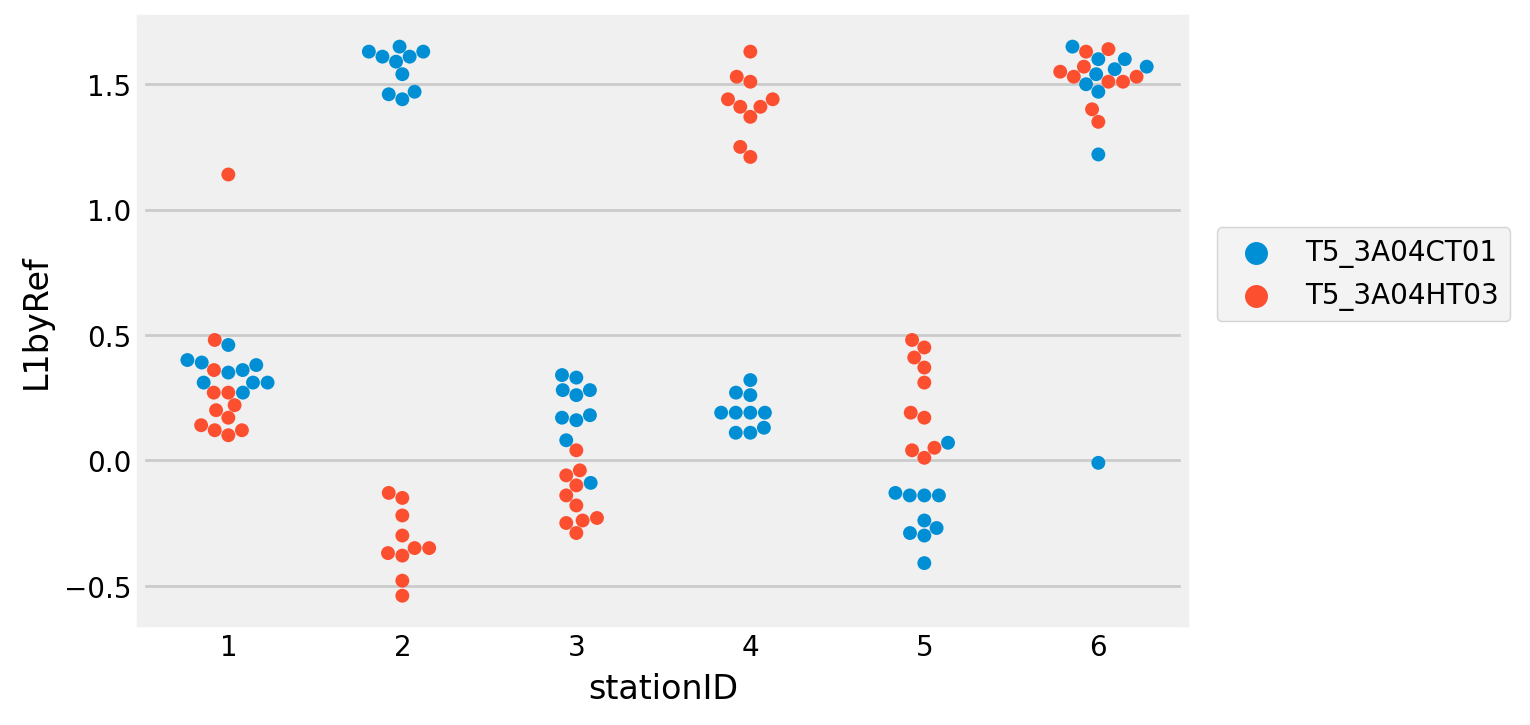

In [5]:
plt.style.use('fivethirtyeight')
plt.figure(dpi=200)
sns.swarmplot(data=CTHT, x='stationID', y='L1byRef', hue='Station')
plt.legend(loc=(1.03, 0.5))


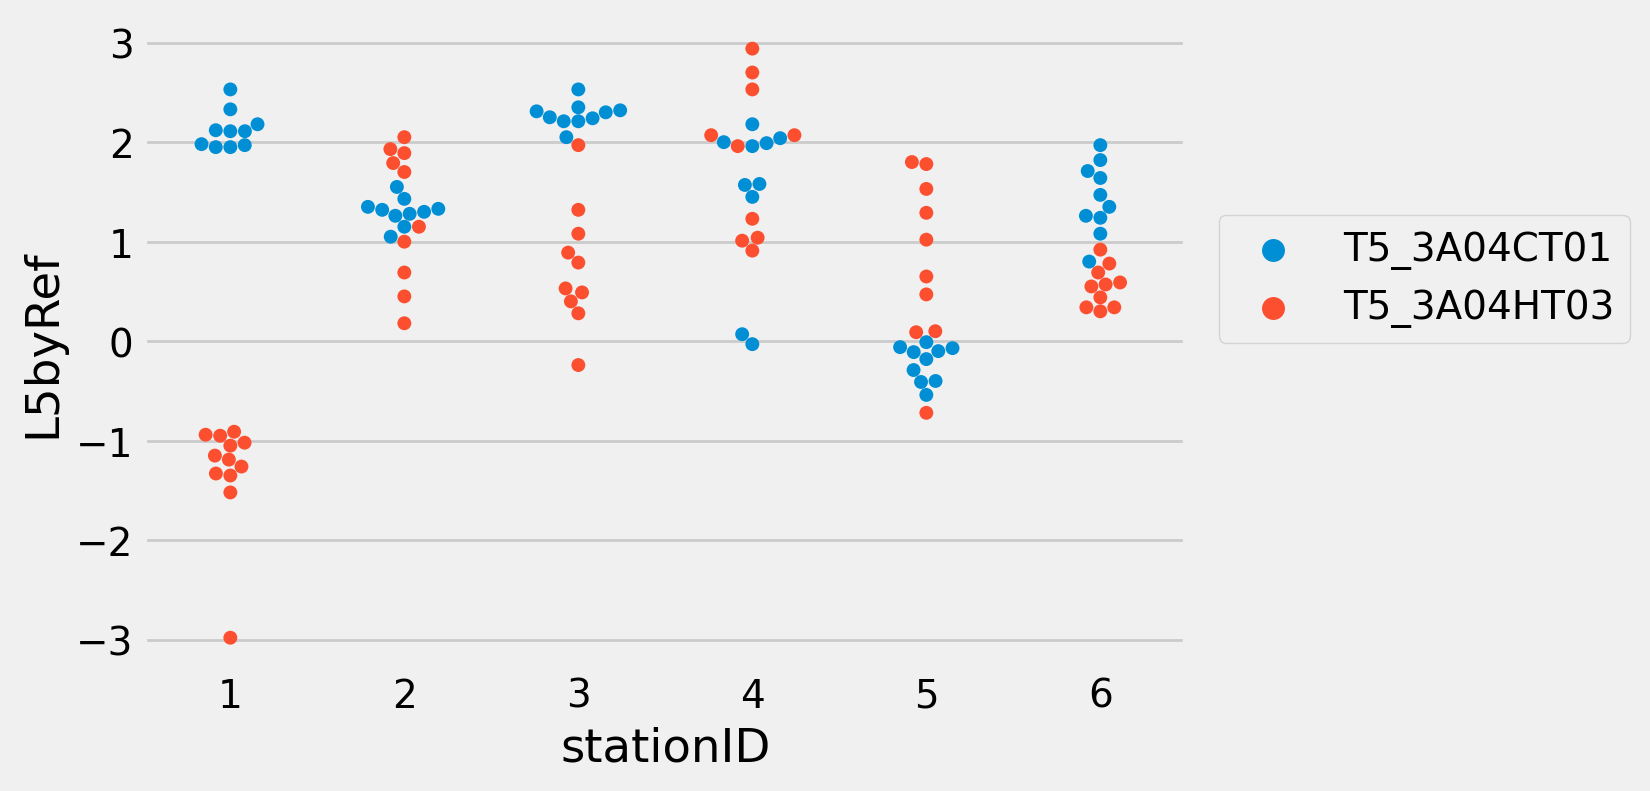

In [6]:
plt.style.use('fivethirtyeight')
plt.figure(dpi=200)
sns.swarmplot(data=CTHT, x='stationID', y='L5byRef', hue='Station')
plt.legend(loc=(1.03, 0.5))

FT

In [15]:
FT.Station.unique()

array(['T5_3A07FT03'], dtype=object)

Text(0.5, 1.0, 'FT')

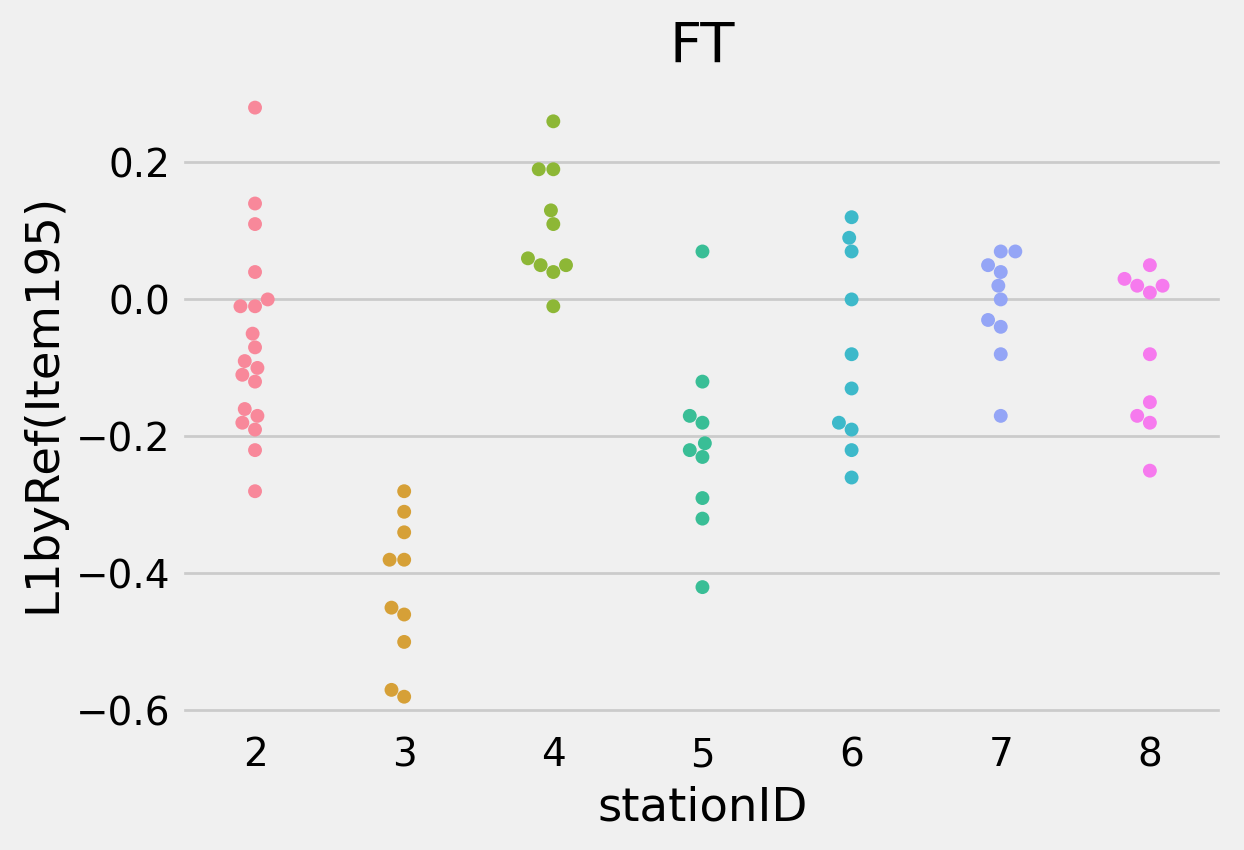

In [12]:
plt.style.use('fivethirtyeight')
plt.figure(dpi=200)
sns.swarmplot(data=FT, x='stationID', y='L1byRef(Item195)')
plt.title('FT')

Text(0.5, 1.0, 'FT')

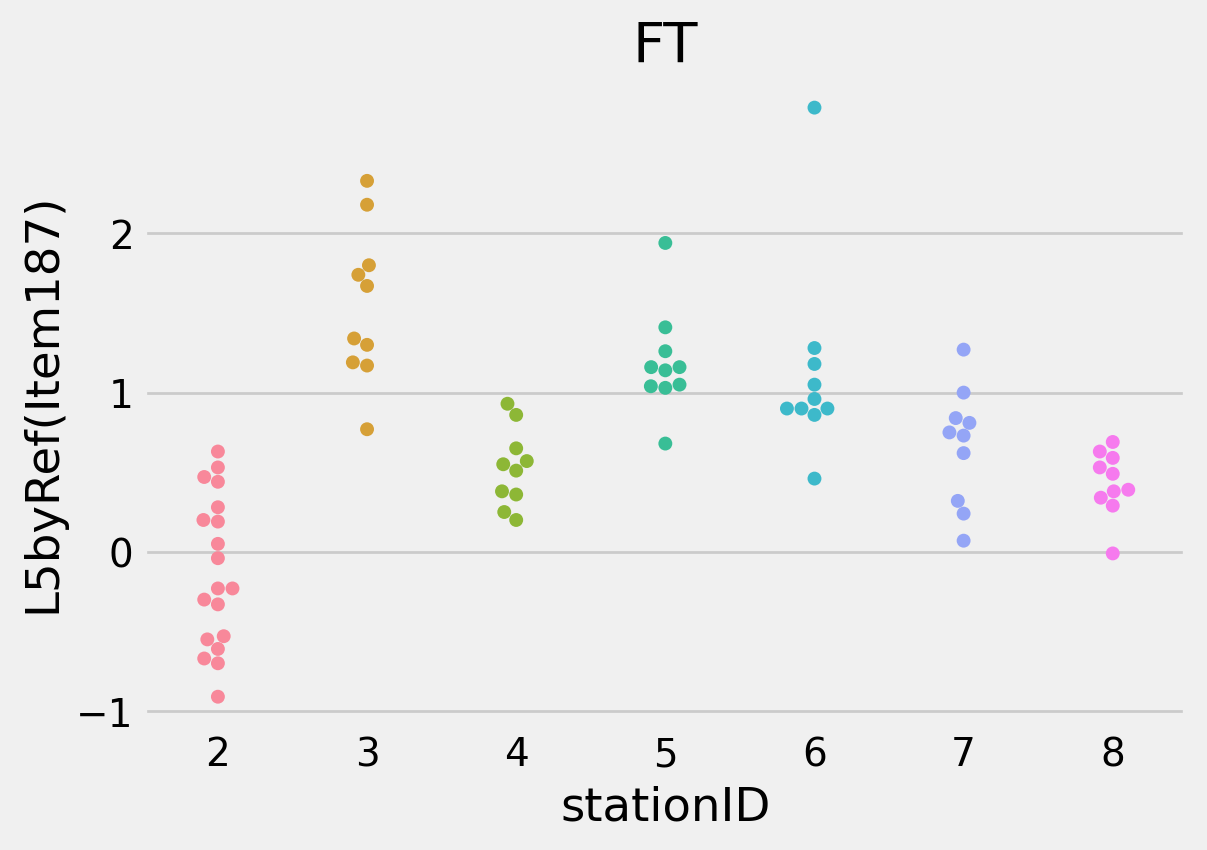

In [13]:
plt.style.use('fivethirtyeight')
plt.figure(dpi=200)
sns.swarmplot(data=FT, x='stationID', y='L5byRef(Item187)')
plt.title('FT')